## * LIBRARIES

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing,
import glob
import matplotlib.pyplot as plt


In [2]:
import os
#CHECK FOLDERS AND FILES
data_path = "/home/himu/Pictures/notebooks/bitcoin pro/archive" 

files = os.listdir(data_path)
len(files)

49

In [3]:
#READ ONE CSV FIRST
sample_file = files[0]
sample_df = pd.read_csv(os.path.join(data_path,sample_file))
sample_df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD
1,2020-10-02,0.5165709853172302,0.5165709853172302,0.0,0.0,0
2,2020-10-03,53.1514892578125,65.30593872070312,0.5238010287284851,0.5238360166549683,0
3,2020-10-04,52.67503356933594,55.07035446166992,50.68899154663086,53.17985916137695,0
4,2020-10-05,53.219242095947266,55.11235809326172,49.787899017333984,52.67503356933594,0


In [4]:
#READ ALL FILES
all_data = []
for file in files :
    file_path = os.path.join(data_path,file)
    df= pd.read_csv(file_path)
    #EXTRACT CRYPTO NAME FROMFILE
    crypto_name = file.replace(".csv","")
    df["crypto"] = crypto_name
    all_data.append(df)

crypto_df = pd.concat(all_data, ignore_index=True)

In [5]:
#VALIDATE COMBINED DATA
crypto_df.shape
crypto_df["crypto"].nunique()

49

In [6]:
#SAVE COMBINED DATA
crypto_df.to_csv("all_crypto_data.csv", index=False)

## * DATA LOADING & INTEGRATION
#### ALL INDIVIDUAL CRYPTOCURRENCY CSV FILES WERE PROGRAMMATICALLY LOADED, LEBELED USING FILE NAMES, AND COMBINED INTO SINGLE DATASET FOR UNIFIED ANALYSIS

In [7]:
crypto_df.head()

,Date,Close,High,Low,Open,Volume,crypto
0,NaN,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD,aave
1,2020-10-02,0.5165709853172302,0.5165709853172302,0.0,0.0,0,aave
2,2020-10-03,53.1514892578125,65.30593872070312,0.5238010287284851,0.5238360166549683,0,aave
3,2020-10-04,52.67503356933594,55.07035446166992,50.68899154663086,53.17985916137695,0,aave
4,2020-10-05,53.219242095947266,55.11235809326172,49.787899017333984,52.67503356933594,0,aave


## * DATA UNDERSTANDING & EDA

### DATA OVERVIEW

In [8]:
crypto_df.head()


,Date,Close,High,Low,Open,Volume,crypto
0,NaN,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD,AAVE-USD,aave
1,2020-10-02,0.5165709853172302,0.5165709853172302,0.0,0.0,0,aave
2,2020-10-03,53.1514892578125,65.30593872070312,0.5238010287284851,0.5238360166549683,0,aave
3,2020-10-04,52.67503356933594,55.07035446166992,50.68899154663086,53.17985916137695,0,aave
4,2020-10-05,53.219242095947266,55.11235809326172,49.787899017333984,52.67503356933594,0,aave


In [9]:
crypto_df.tail()

,Date,Close,High,Low,Open,Volume,crypto
112050,2026-01-01,1.8779360055923462,1.8779360055923462,1.8252300024032593,1.8399790525436401,1401659084,xrp
112051,2026-01-02,2.00581693649292,2.0228350162506104,1.8674219846725464,1.8779350519180298,3614813049,xrp
112052,2026-01-03,2.017406940460205,2.0536348819732666,1.9885189533233643,2.00580096244812,2345137866,xrp
112053,2026-01-04,2.0900208950042725,2.116791009902954,2.017153024673462,2.017404079437256,3214249708,xrp
112054,2026-01-05,2.2147276401519775,2.2147276401519775,2.089047431945801,2.0900380611419678,3988764928,xrp


In [10]:
crypto_df.shape

(112055, 7)

In [11]:
crypto_df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'crypto'], dtype='object')

In [12]:
crypto_df.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
crypto    object
dtype: object

In [13]:
num_cols= ['Close', 'High', 'Low', 'Open', 'Volume']
for col in num_cols:
    crypto_df[col]= pd.to_numeric(crypto_df[col],errors="coerce")

df = crypto_df.sort_values(["crypto","Date"])

In [14]:
crypto_df['Date']=pd.to_datetime(crypto_df["Date"], errors="coerce")

### DATA QUALITY CHECK

In [15]:
df.isna().sum()

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
crypto    0
dtype: int64

In [16]:
crypto_df.duplicated().sum()

np.int64(0)

In [17]:
crypto_df= crypto_df.dropna(subset=["Date"])

In [18]:
crypto_df = crypto_df.sort_values(["crypto","Date"])

In [19]:
crypto_df

,Date,Close,High,Low,Open,Volume,crypto
1,2020-10-02,0.516571,0.516571,0.000000,0.000000,0.000000e+00,aave
2,2020-10-03,53.151489,65.305939,0.523801,0.523836,0.000000e+00,aave
3,2020-10-04,52.675034,55.070354,50.688992,53.179859,0.000000e+00,aave
4,2020-10-05,53.219242,55.112358,49.787899,52.675034,0.000000e+00,aave
5,2020-10-06,42.401600,53.402271,40.734577,53.291969,5.830910e+05,aave
...,...,...,...,...,...,...,...
112050,2026-01-01,1.877936,1.877936,1.825230,1.839979,1.401659e+09,xrp
112051,2026-01-02,2.005817,2.022835,1.867422,1.877935,3.614813e+09,xrp
112052,2026-01-03,2.017407,2.053635,1.988519,2.005801,2.345138e+09,xrp
112053,2026-01-04,2.090021,2.116791,2.017153,2.017404,3.214250e+09,xrp


## * COVERAGE ANALYSIS

### HOW MUCH DATA DO I HAVE FOR EACH CRYPTO?

In [20]:
#coverage = crypto_df.groupby("crypto")["Date"].agg(["min","max","count"]).sort_values("count", ascending=False)

coverage = crypto_df.groupby("crypto")["Date"].count().reset_index(name="count")
coverage.head()

,crypto,count
0,aave,1922
1,algorand,2391
2,aptos,1175
3,arbitrum,1020
4,avalanche,1934


In [21]:
coverage["active_years"] = coverage["count"]/365
coverage.head()
coverage.columns

Index(['crypto', 'count', 'active_years'], dtype='object')

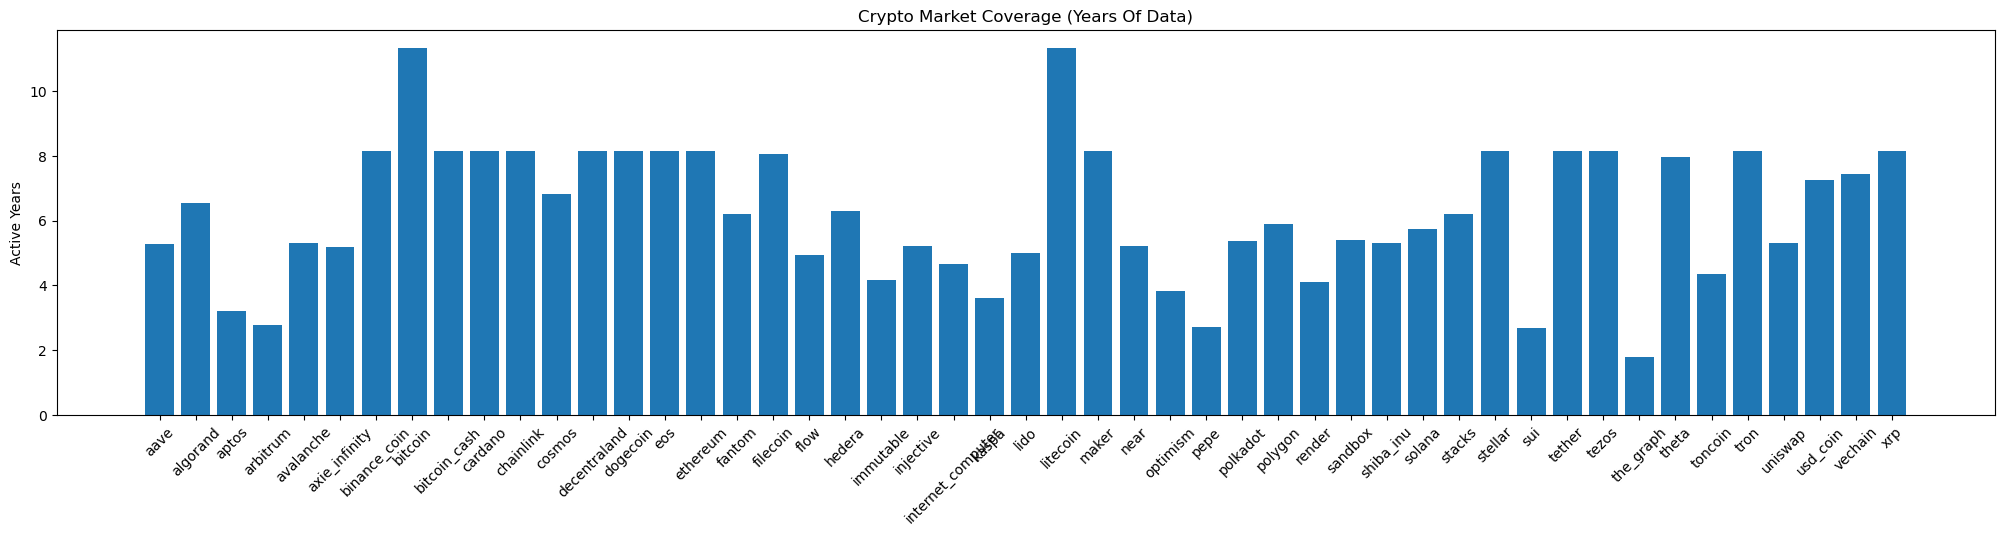

In [22]:
plt.figure(figsize=(25,5))
plt.bar(coverage["crypto"],coverage["active_years"])
plt.xticks(rotation=45)
plt.ylabel("Active Years")
plt.title("Crypto Market Coverage (Years Of Data)")
plt.show()

1) BITCOIN AND LITECOIN ARE AMONG OLDEST CRYPTOS IN DATASET
2) LONG ACTIVE CRYPTOS HAVE EXPERIENCED: * MULTIPLE BULL MARKETS, * MAJOR CRASHES, * REGULATORY CHANGES

### THEREFORE RISK AND  TREND ANALYSIS IS MORE RELIABLE FOR CRYPTOS WITH HIGHER ACTIVE YEARS

## * PRICE BEHAVIOR

### HOW DOES PRICE MOVE OVER TIME?

<Axes: title={'center': 'BITCOIN CLOSING PRICE'}, xlabel='Date'>

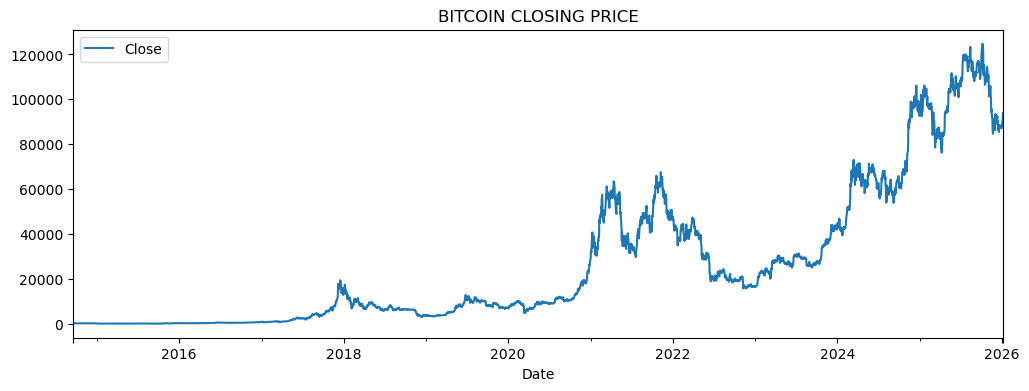

In [23]:
btc = crypto_df[crypto_df["crypto"]=="bitcoin"]

btc.plot(x="Date" ,y="Close", figsize=(12,4), title="BITCOIN CLOSING PRICE")

## * DAILY returns

### HOW FASTV AND HOW WILDLY DOES PRICE CHANGE DAY TO DAY?

In [24]:
crypto_df["daily_returns"]= (crypto_df.groupby("crypto")
                             ["Close"].pct_change())

In [25]:
# CONVERT NUMERIC IN MARKET SNETIMENT
crypto_df["market_move"] = np.where(crypto_df["daily_returns"] > 0, "BULL", np.where(crypto_df["daily_returns"]<0, "BEAR", "NEUTRAL"))
crypto_df.head()

,Date,Close,High,Low,Open,Volume,crypto,daily_returns,market_move
1,2020-10-02,0.516571,0.516571,0.000000,0.000000,0.0,aave,NaN,NEUTRAL
2,2020-10-03,53.151489,65.305939,0.523801,0.523836,0.0,aave,101.892905,BULL
3,2020-10-04,52.675034,55.070354,50.688992,53.179859,0.0,aave,-0.008964,BEAR
4,2020-10-05,53.219242,55.112358,49.787899,52.675034,0.0,aave,0.010331,BULL
5,2020-10-06,42.401600,53.402271,40.734577,53.291969,583091.0,aave,-0.203266,BEAR


In [26]:
#FREQUENCY : HOW OFTEN IS EACH CRYPTO BULLISH  AND  BEARISH ? 
sentiment = (crypto_df[crypto_df["market_move"] != "NEUTRAL"].groupby("crypto")["market_move"].value_counts(normalize=True).unstack())
sentiment.head()

market_move,BEAR,BULL
crypto,,
aave,0.498699,0.501301
algorand,0.501255,0.498745
aptos,0.523850,0.476150
arbitrum,0.516192,0.483808
avalanche,0.500259,0.499741


In [27]:
sentiment["bull_bear_ratio"]= sentiment["BULL"]/sentiment["BEAR"]
sentiment.head()

market_move,BEAR,BULL,bull_bear_ratio
crypto,,,
aave,0.498699,0.501301,1.005219
algorand,0.501255,0.498745,0.994992
aptos,0.523850,0.476150,0.908943
arbitrum,0.516192,0.483808,0.937262
avalanche,0.500259,0.499741,0.998966


BEAR BULL RATIO :
RATIO > 1 = MORE BULLISH DAYS
RATIO < 1 = MORE BEARISH DAYS

In [28]:
#FILTER BULL AND BEAR DAYS
sentiment_counts= (crypto_df.loc[(crypto_df["market_move"]=="BULL") | (crypto_df["market_move"]== "BEAR")].groupby(["crypto","market_move"]).size().unstack(fill_value=0))

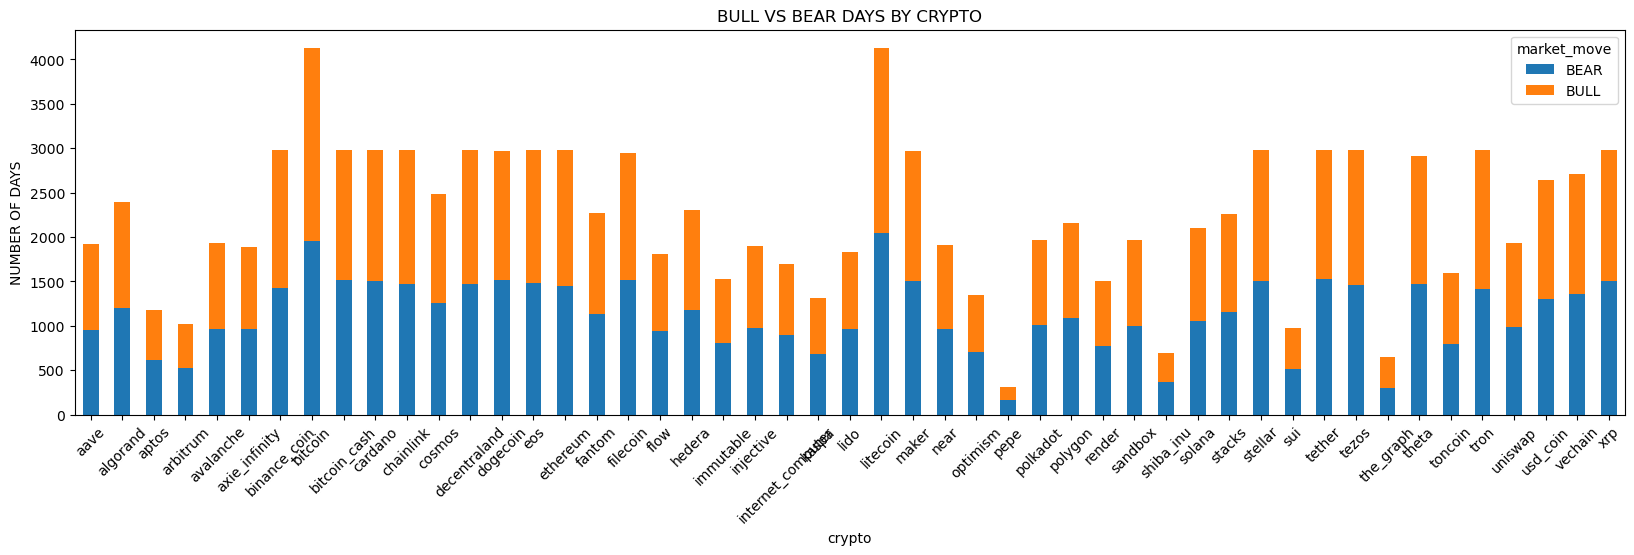

In [29]:
sentiment_counts.plot(kind="bar", stacked = True, figsize = (20,5), title = "BULL VS BEAR DAYS BY CRYPTO")
plt.ylabel("NUMBER OF DAYS" )
plt.xticks(rotation=45)
plt.show()

1) DAILY RETURN SHOWS HIGH SHORT TERM VOLATILITY
2) BULLISH AND BEARSH DAYS ARE CLOSELY BALANCED
3) EVEN STRONG CRYPTOS EXPERIENCE FREQUENT PULLBACKS
4) BULL-BEAR RATION HELPS IDENTIFY SHORT-TERM MARKET SENTIMENT, NOT LONG TERM PROFITABILITY


## * VOLATILITY COMPARISON

### WHICH CRYPTO IS RISKY AND WICH ARE SAFER?

In [30]:
volatility = (crypto_df.groupby("crypto")["daily_returns"].std().sort_values(ascending=False))
volatility_df =  volatility.reset_index(name = "daily_volatility")
volatility_df.head()


,crypto,daily_volatility
0,optimism,53.591698
1,aave,2.325453
2,the_graph,0.606566
3,dogecoin,0.092796
4,render,0.087171


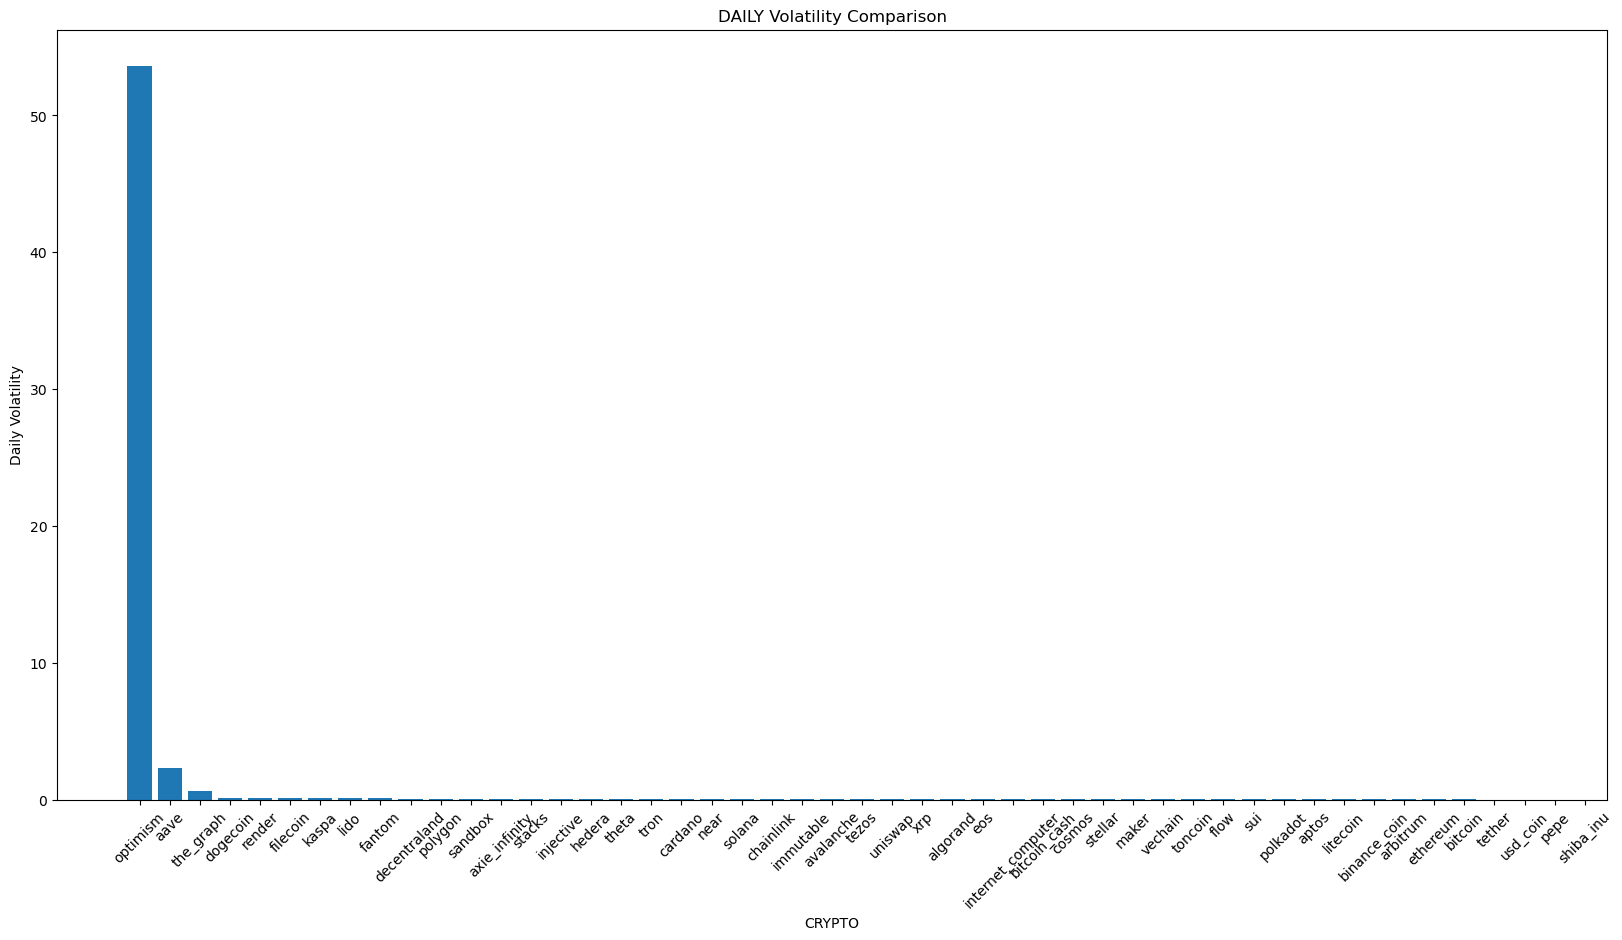

In [31]:
plt.figure(figsize=(20,10))
plt.bar(volatility_df["crypto"], volatility_df["daily_volatility"])
plt.title("DAILY Volatility Comparison")
plt.ylabel( "Daily Volatility")
plt.xlabel("CRYPTO")
plt.xticks(rotation=45)
plt.show()

In [32]:
#ANNUALIZED VOLATILITY 
volatility_df["annual_volatility"] = (volatility_df["daily_volatility"]*np.sqrt(365))

volatility_df.head()

,crypto,daily_volatility,annual_volatility
0,optimism,53.591698,1023.867946
1,aave,2.325453,44.427725
2,the_graph,0.606566,11.588428
3,dogecoin,0.092796,1.772865
4,render,0.087171,1.665401


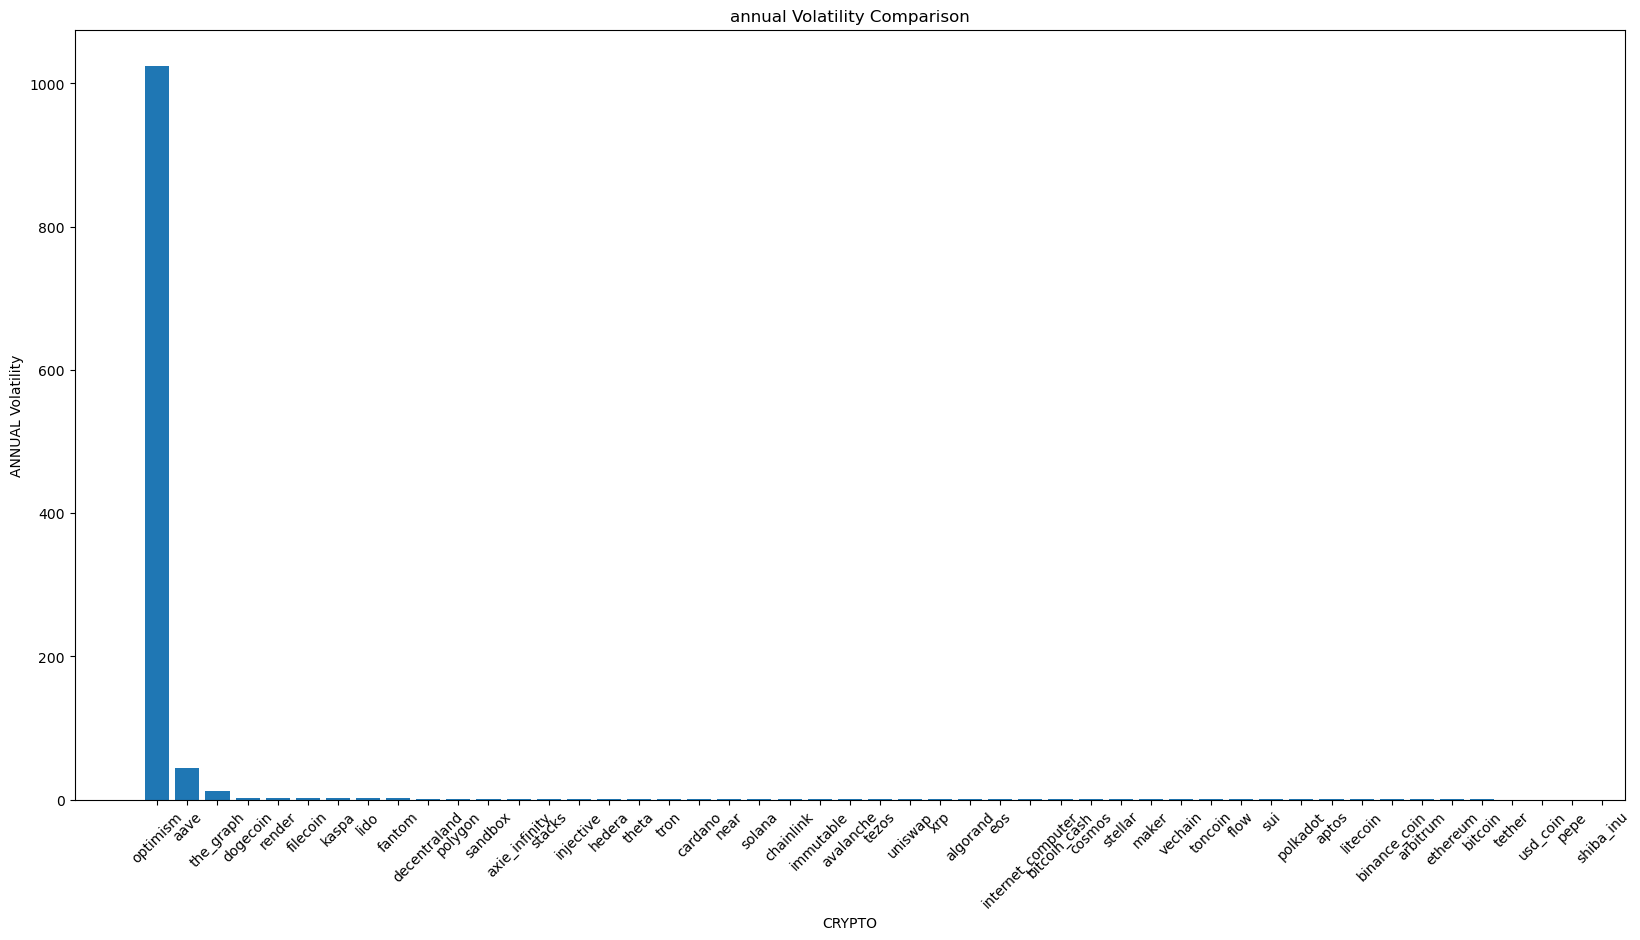

In [33]:
plt.figure(figsize=(20,10))
plt.bar(volatility_df["crypto"], volatility_df["annual_volatility"])
plt.title("annual Volatility Comparison")
plt.ylabel( "ANNUAL Volatility")
plt.xlabel("CRYPTO")
plt.xticks(rotation=45)
plt.show()

#### WE ANALYZED DAILYRETURNS TO UNDERSTAND RISK CHARACTERISTICS ACROSS CRYPTOCURRENCIES. HIGHER STANDARD DEVIATIONINDICATES HIGHER VOLATILITY
1) TALLER BAR = HIGHER RISK, SHORTER BAR = MORE STABLE, 
2) HIGHER VATILITY : * BIGGER GAIN POSSIBLE, * BIGGER LOSSES POSSIBLE.
3) CRYPTOS WITH  HIGH DAILY  VOLATILITY == ALSOHIGH ANNUALVOLATILITY
4) ANNULIZED PLOT MAKES RISK DIFFERENCE MORE VISIBLE

## *CRYPTO GROWTH
#### WHICH CRYPTO GREW MOST OVER TIIME

In [34]:
price_change= (crypto_df.groupby("crypto")["Close"].agg(["first","last"]))

In [43]:
price_change.columns

Index(['first', 'last', 'growth_pct'], dtype='object')

In [36]:
price_change["growth_pct"]=(price_change["last"]-price_change["first"]/ price_change["first"] * 100)

In [46]:
price_change.head()

,first,last,growth_pct
crypto,,,
aave,0.516571,171.789383,71.789383
algorand,3.201412,0.136821,-99.863179
aptos,7.240589,1.966552,-98.033448
arbitrum,1.331082,0.218676,-99.781324
avalanche,4.896294,14.215121,-85.784879


## * DRAWDON ANALYSIS : 
### DRAWDOWN = HOW MUCH PRICE FELL FROM ITS HIGHTEST POINT

In [38]:
crypto_df["rolling_max"]= (crypto_df.groupby("crypto")["Close"].cummax())
crypto_df["drawdown"] = (crypto_df["Close"]-crypto_df["rolling_max"])/crypto_df["rolling_max"]
crypto_df.head()

,Date,Close,High,Low,Open,Volume,crypto,daily_returns,market_move,rolling_max,drawdown
1,2020-10-02,0.516571,0.516571,0.000000,0.000000,0.0,aave,NaN,NEUTRAL,0.516571,0.000000
2,2020-10-03,53.151489,65.305939,0.523801,0.523836,0.0,aave,101.892905,BULL,53.151489,0.000000
3,2020-10-04,52.675034,55.070354,50.688992,53.179859,0.0,aave,-0.008964,BEAR,53.151489,-0.008964
4,2020-10-05,53.219242,55.112358,49.787899,52.675034,0.0,aave,0.010331,BULL,53.219242,0.000000
5,2020-10-06,42.401600,53.402271,40.734577,53.291969,583091.0,aave,-0.203266,BEAR,53.219242,-0.203266


In [39]:
#MAX DRAWDOWN PER CRYPTO
max_drawdown = (crypto_df.groupby("crypto")["drawdown"].min().reset_index(name="max_drawdown"))
max_drawdown.head()

,crypto,max_drawdown
0,aave,-0.921824
1,algorand,-0.972343
2,aptos,-0.920799
3,arbitrum,-0.922357
4,avalanche,-0.934679


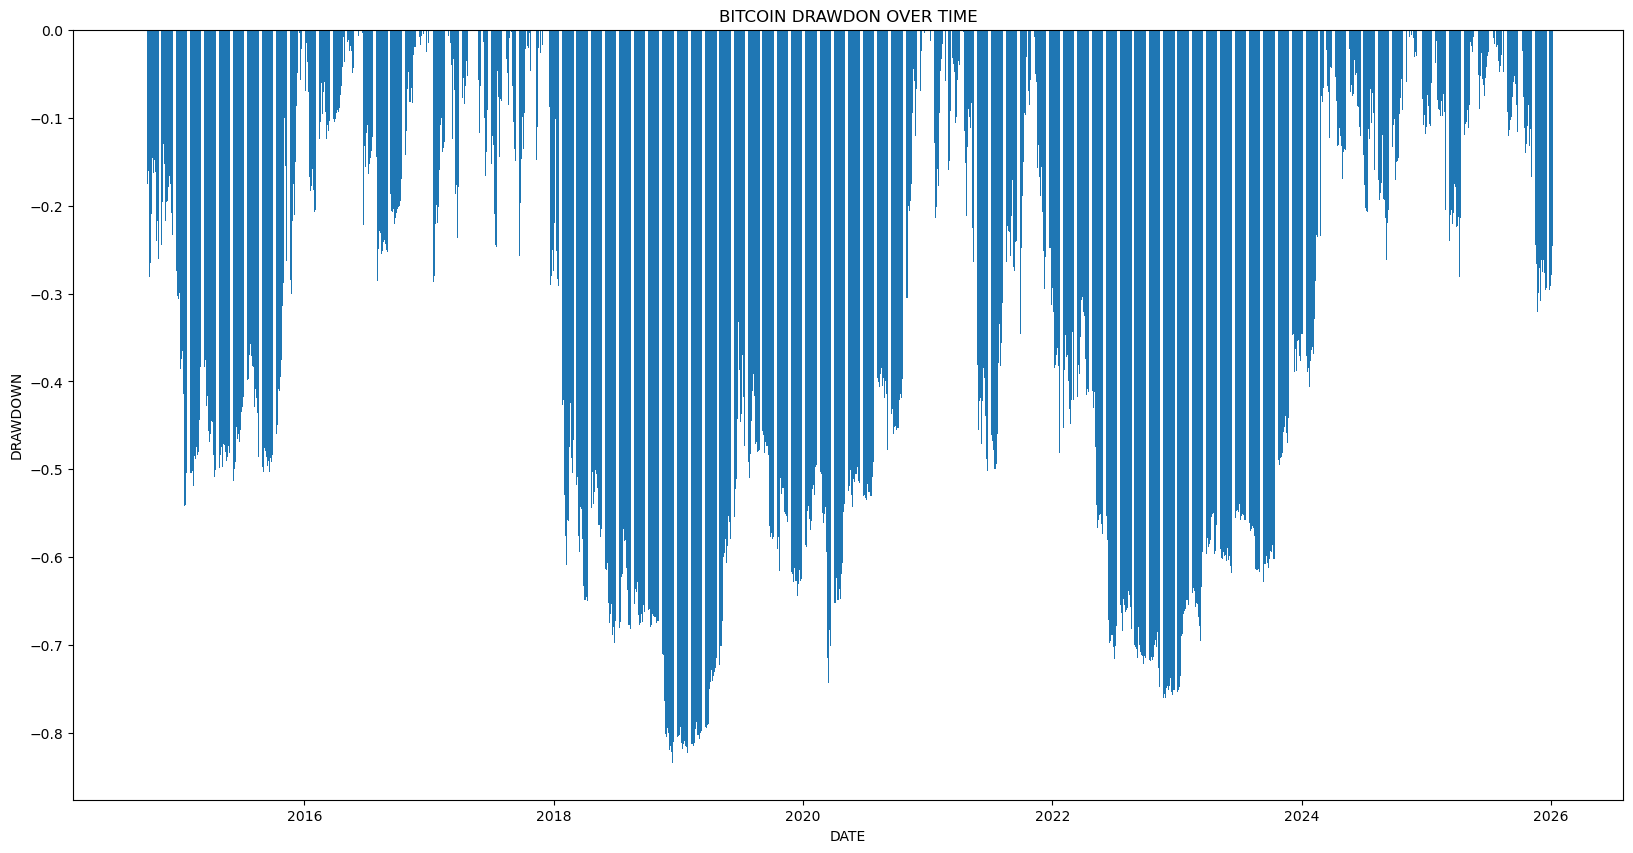

In [40]:
btc = crypto_df[crypto_df["crypto"]== "bitcoin"]

plt.figure(figsize=(20,10))
plt.bar(btc["Date"], btc["drawdown"])
plt.title("BITCOIN DRAWDON OVER TIME")
plt.ylabel( "DRAWDOWN")
plt.xlabel("DATE")
plt.show()

#### WHATIT SHOWS ?
##### CRASH PERIODS, RECOVERY SPEED, DEPTH OF LOSSES
#### HOW TO INTERPRET : 1)-0.20 = MILD CORRECTION, 2) -0.50 = SEVERE CRASH, 3) -0.80 EXTREME MARKET COLLAPSE

## INSIGHT 

### * CRYPTOCURRENCIES WITH LONGER COVERAGE PROVIDE MORE RELIABLE TREND AND RISK ANALYYSIS, WHILE ASSETS WITH SHORTER COVERAGE MAY SHOW BIASED OR INCOMPLTETE RISK BEHAVIOR DUE TO LIMITED HISTORICAL EXPOSURE.

### * OVERALL ANALYSIS INDICATES THAT CRYPTOCURRENCIES ARE HIGHLY VOLATILE ASSESTS WITH FREQUENT SHORT TERM PRICE REVERSALS BUT POTENTIAL FOR LONG TERM GROWTH. ESTABLISHED CRYPTOCURRENCIES WITH LONGER HISTORICAL COVERGAE TEND TO EXHIBIT LOWER VOLATILITY AND FASTER RECOVERY FROM DRAWDOWNS, WHILE NEWER ASSETS SHOW HIGHER RISK AND DEEPER LOSSES.

### * THESE FINDINGS HIGHLIGHT THE IMPORTANCE OF UNDERSTANDING BOTH RETURN BEHAVIOR AND DOWNSIDE RISK WHEN EVALUATING CRYPTOCURRENCY INVESTMENTS.